In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
import statsmodels.api as sm
%matplotlib inline

In [32]:
#import the cleaned data set
df=pd.read_csv('Dataset2-SanDiego_cleaned_data.csv', index_col=0)

In [33]:
df.head()

,area in sqft,baths,beds,latitude,longitude,monthly price in $
0,3075.0,3.0,5.0,33.004779,-117.11568,4200.0
1,1454.0,3.0,3.0,32.997999,-117.07016,2750.0
2,1200.0,2.5,2.0,32.737260,-117.17339,4000.0
3,900.0,1.5,2.0,32.756715,-117.11222,2150.0
4,839.0,2.0,2.0,32.751067,-117.10532,2100.0


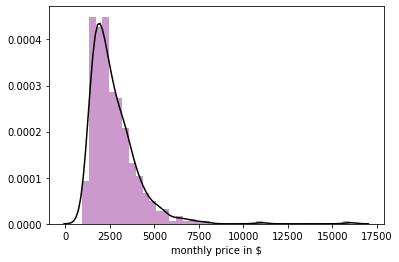

In [34]:
#seaborn distribution plot for the 'monthly prive in $'' column
sns.distplot(df['monthly price in $'], color='purple',
            kde_kws={"color": "k"})

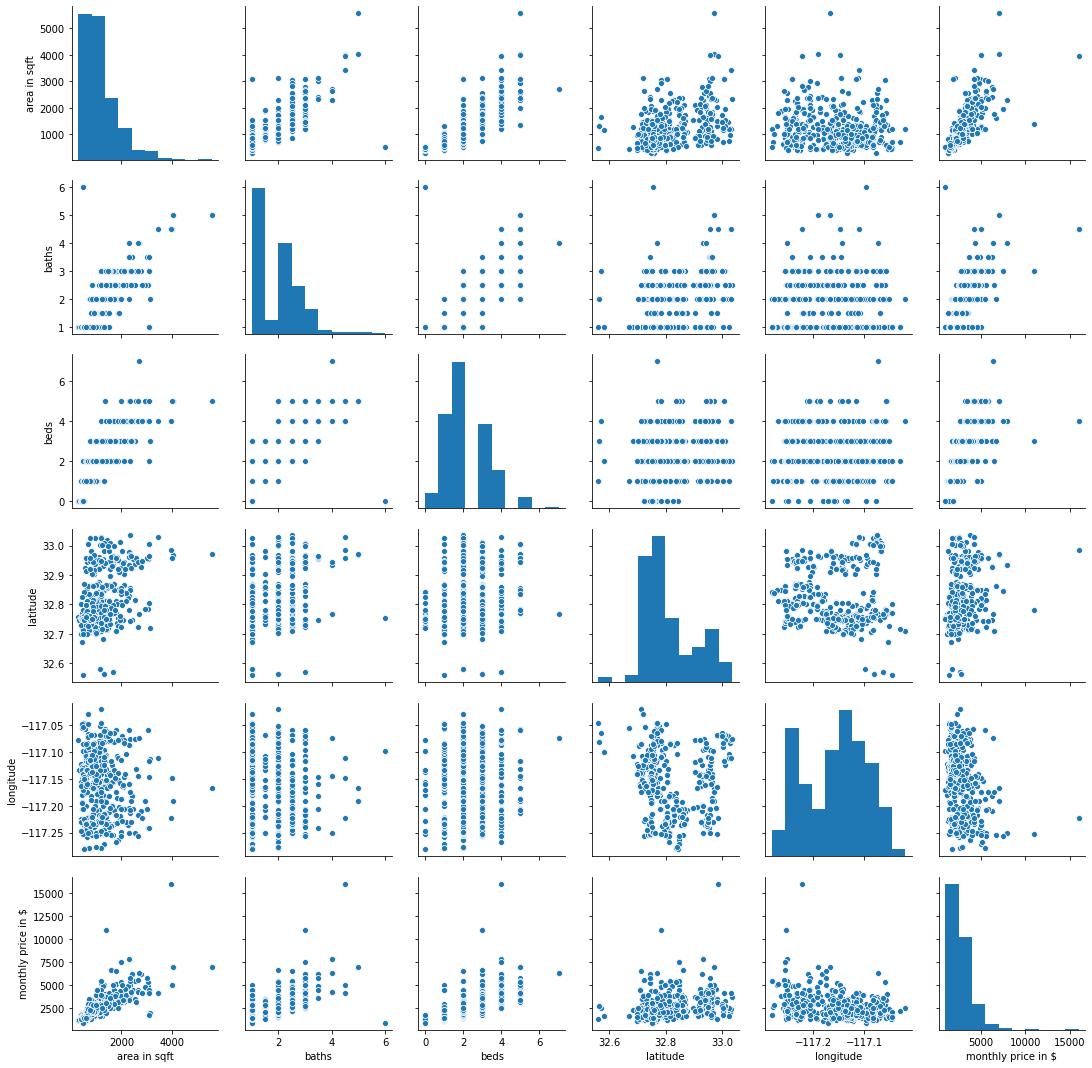

In [35]:
#use the seaborn pairplot to observe the correlation between the features
sns.pairplot(df)

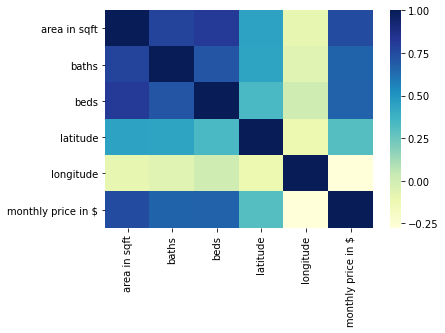

In [36]:
#show the correlation between the items
sns.heatmap(df.corr(), cmap='YlGnBu')

Text(0, 0.5, 'Price')

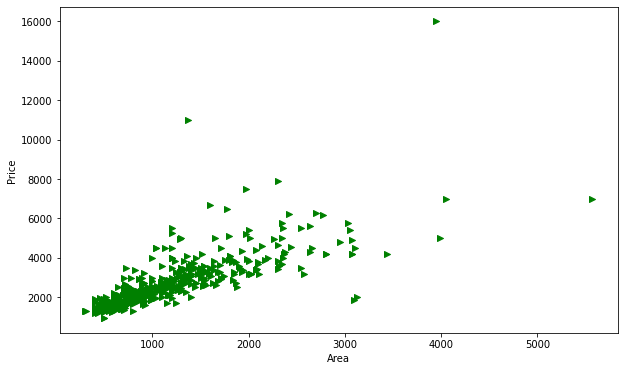

In [37]:
#show the correlation between the area and the monthly price
plt.figure(figsize=(10,6))
plt.scatter(df['area in sqft'], df['monthly price in $'], c='green', marker='>')
plt.xlabel('Area')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

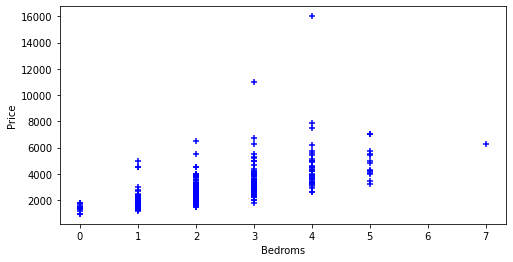

In [38]:
#show the correlation between the price and the bedrooms
plt.figure(figsize=(8,4))
plt.scatter(df['beds'], df['monthly price in $'], c='blue', marker='+')
plt.xlabel('Bedroms')
plt.ylabel('Price')

# Model Training and Prediction 

In [47]:
#dividing and train dataset
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [48]:
X1=df[['area in sqft', 'baths', 'beds']]
y=df['monthly price in $']

In [79]:
#20% are test samples, 80% is used for model training
X1_train, X1_test, y_train, y_test = train_test_split(
X1, y, test_size=0.1, random_state=40)

## Linear Regression

In [80]:
lm = LinearRegression()

In [81]:
# train our linear regression model
lm.fit(X1_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
predict=lm.predict(X1_test)

Text(0, 0.5, 'Predicted Y')

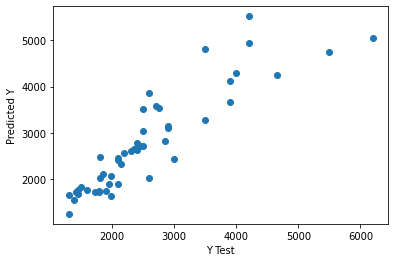

In [83]:
plt.scatter(y_test,predict)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [84]:
#Mean Absolute Error
print('MAE:', metrics.mean_absolute_error(y_test, predict))

MAE: 402.4247654464755


## Model Performance

#### Linear Regression Model Score

In [87]:
#evaluation the score of our model
lm.score(X1_test, y_test) #75,79 % 

0.757950361571444

## K fold cross validation score

In [86]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X1, y , cv=cv)

array([0.56348845, 0.62954209, 0.47949831, 0.5064456 , 0.6246522 ,
       0.51360501, 0.59685017, 0.48775709, 0.69657208, 0.7186849 ])

In [101]:
def price_prediction(sqft, baths, beds):
    x=np.zeros(len(X1.columns))
    x[0]= sqft
    x[1]= baths
    x[2]= beds
    
    return lm.predict([x])[0]
    

In [105]:
price_prediction(1000, 2, 3)

2725.124304074172

In [107]:
#safe in pickle file
import pickle
with open('san_diego_price_model.pickle', 'wb') as f:
    pickle.dump(lm,f)

In [108]:
#safe in json file
import json
columns={'data': [col.lower() for col in X1.columns]}

with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))